**Regression Project using PyCaret Python Library**<br>
By: Jose German

# Install requirements

In [1]:
# install pycaret; full installation including dependancies
#pip install pycaret[full]

# install pycaret plus all dependencies
# visual studio code recommends to use %pip instead fo !pip
#%pip install pycaret # <--------------------------------------

In [2]:
# Install analysis components of PyCaret which allow interpret_model function further in code

#%pip install pycaret[analysis] # <--------------------------------------

In [3]:
# Install MLFlow
# This library manages the ML project; It also used to track parameters, metrics, hyperparameters, feature parameters, code versions, etc
#%pip install mlflow # <--------------------------------------

In [4]:
# Gradio library used by PyCaret to create a simple web application

#%pip install gradio
#%pip install gradio==3.50 # <--------------------------------------

In [5]:
# Pydantic library used by PyCaret to build a simple API

#%pip install pydantic==1.10.12 # <--------------------------------------

# Downgrade pydantic 2.6.0; Too many annotation type errors


In [6]:
# May be required to build the dashboard

##%pip install explainerdashboard # <--------------------------------------

# Imports

In [1]:
# check installed version; should be 3.0 or newer
import pycaret
pycaret.__version__

'3.2.0'

In [2]:
import pandas as pd

# Loading dataset

In [3]:
# Here we load our CSV dataset into a pandas dataframe

#housedata = pd.read_csv('/content/new_train.csv')
housedata = pd.read_csv('C:\\Users\\joseg\\Documents\\GitHub\\csml1000-project1\\houseprices_modified.csv') #csv path
housedata.head()

,LotFrontageSF,LotAreaSF,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMaterial,...,GrLivArea,GarageType,GarageYrBlt,GarageCars,GarageSF,GarageQual,WoodDeckSF,OpenPorchSF,MiscFeature,SalePrice
0,65.0,8450,Single Family Detached,2 Story,7,5,2003,2003,Gable,Standard Composite Shingle,...,1710,Attached,2003,2,548,3,0,61,None,208500
1,80.0,9600,Single Family Detached,1 Story,6,8,1976,1976,Gable,Standard Composite Shingle,...,1262,Attached,1976,2,460,3,298,0,None,181500
2,68.0,11250,Single Family Detached,2 Story,7,5,2001,2002,Gable,Standard Composite Shingle,...,1786,Attached,2001,2,608,3,0,42,None,223500
3,60.0,9550,Single Family Detached,2 Story,7,5,1915,1970,Gable,Standard Composite Shingle,...,1717,Detached,1998,3,642,3,0,35,None,140000
4,84.0,14260,Single Family Detached,2 Story,8,5,2000,2000,Gable,Standard Composite Shingle,...,2198,Attached,2000,3,836,3,192,84,None,250000


# Initial setup

In [4]:
# Inial setup of regression ML project. First command uses MLFlow to log experiment

from pycaret.regression import *
reg1 = setup(housedata, target='SalePrice', session_id=123, log_experiment=True, experiment_name='houseprice1')

# Below code line is similar to above except here we don't need MLFLow to log the experiment
#reg1 = setup(housedata, target='SalePrice', session_id=123)

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1456, 32)"
4,Transformed data shape,"(1456, 68)"
5,Transformed train set shape,"(1019, 68)"
6,Transformed test set shape,"(437, 68)"
7,Numeric features,23
8,Categorical features,8
9,Rows with missing values,22.9%


2024/02/06 20:11:22 INFO mlflow.tracking.fluent: Experiment with name 'houseprice1' does not exist. Creating a new experiment.
2024/02/06 20:11:22 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



# Compare model baselines
Compare models function trains and evaluates the performance of al the estimators available in the model library using cross validation. The output is a scoring grid with average cross validated scored.

In [5]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16078.4104,576565664.6589,23807.9448,0.9060,0.1309,0.0949,0.1060
lightgbm,Light Gradient Boosting Machine,16885.0677,654045127.8792,25373.7972,0.8931,0.1377,0.0992,0.1120
et,Extra Trees Regressor,17289.0104,670899361.3481,25635.0656,0.8912,0.1423,0.1043,0.1400
rf,Random Forest Regressor,17793.3676,730145650.3652,26831.1587,0.8804,0.1463,0.1067,0.2220
br,Bayesian Ridge,19485.8968,783138693.6237,27726.7077,0.8717,0.2112,0.1209,0.0380
ridge,Ridge Regression,19837.4666,789259008.9103,27858.1809,0.8705,0.2185,0.1237,0.0420
llar,Lasso Least Angle Regression,19888.8712,793248849.7724,27927.8244,0.8699,0.2148,0.1242,0.0380
lasso,Lasso Regression,19906.1714,794467455.3906,27947.7355,0.8697,0.2154,0.1244,0.3380
lr,Linear Regression,19942.6637,796220207.6860,27981.6395,0.8694,0.2152,0.1246,0.4720
en,Elastic Net,20160.9474,902852107.7980,29729.4959,0.8523,0.2077,0.1234,0.0440


`compare_model` uses all estimators in model library except models with `Turbo=False`. `models()` will list all available modelss.

In [6]:
# Show best model
best_model

GradientBoostingRegressor(random_state=123)

# Analyze model
Plot model function analyzes the performance of the trained model ona test test.

In [13]:
# Check help for available plots
#help(plot_model)

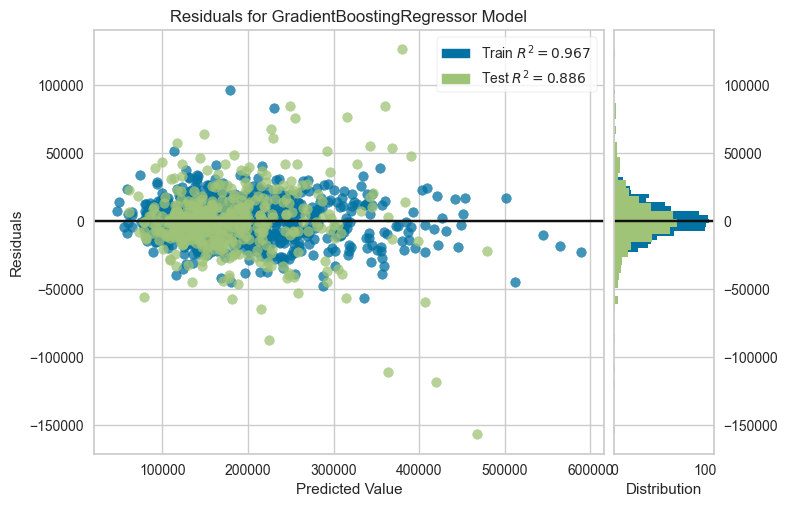

In [7]:
# Lets plot residuals
plot_model(best_model, plot='residuals')

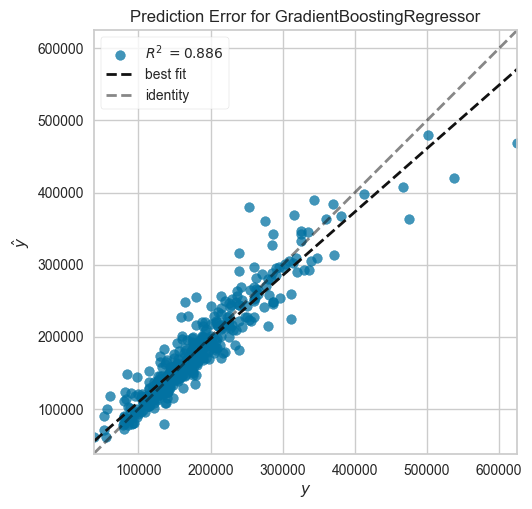

In [8]:
# Lets plot the errors
plot_model(best_model, plot='error')

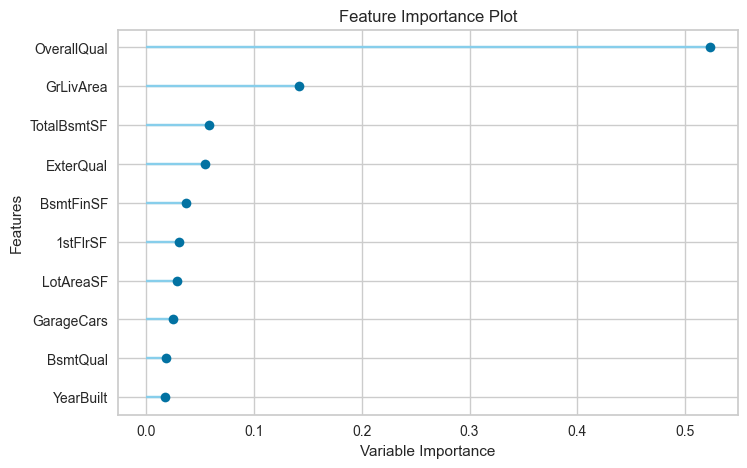

In [9]:
# Lets plot feature importance
plot_model(best_model, plot='feature')

# Create model

CatBoost Regressor used here which is the best model.

In [10]:
# Train model with default fold=10
gbr = create_model(best_model)

# Similar as above code line with specific number of folds
#lightgbm = create_model('lightgbm', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17967.4292,723030319.7446,26889.2231,0.9026,0.1501,0.1043
1,18080.8352,694439971.5315,26352.2290,0.8638,0.1396,0.1006
2,15900.0473,594451534.4195,24381.3768,0.8904,0.1337,0.0986
3,13803.9277,313128950.5808,17695.4500,0.9280,0.1248,0.0966
4,15148.2626,473264664.8364,21754.6470,0.9217,0.1404,0.1008
5,15488.2358,577398022.0034,24029.1078,0.8808,0.1323,0.0925
6,19755.5878,1084628543.1915,32933.6992,0.8738,0.1362,0.0998
7,19945.1114,972821606.7218,31190.0883,0.8797,0.1616,0.1139
8,14781.0791,470430359.5946,21689.4066,0.9156,0.1062,0.0792


`compare_models` allows specific models to be compared.

In [11]:
# Compare top 3 models
compare_regression_models = compare_models(include = ['lightgbm','gbr','br'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16580.4464,632335525.6557,24740.3304,0.8971,0.1331,0.0968,0.1140
lightgbm,Light Gradient Boosting Machine,16885.5229,659093465.2598,25343.0882,0.8916,0.1358,0.0985,0.1170
br,Bayesian Ridge,19492.7425,780725497.6323,27633.1188,0.8703,0.2075,0.1206,0.0380


In [12]:
# Show best model from the top 3 specified in previous cell
compare_regression_models

GradientBoostingRegressor(random_state=123)

By default `compare_models` return the single best performing model (as seen in above cell) based on a defined metric.

In [13]:
# Get top 3 model based on MAE
best_mae_models_top3 = compare_models(sort = 'MAE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16580.4464,632335525.6557,24740.3304,0.8971,0.1331,0.0968,0.1110
lightgbm,Light Gradient Boosting Machine,16885.5229,659093465.2598,25343.0882,0.8916,0.1358,0.0985,0.1140
et,Extra Trees Regressor,17329.2122,684791969.6165,25790.8421,0.8886,0.1422,0.1035,0.1420
rf,Random Forest Regressor,17713.8997,747625887.9746,26946.6428,0.8783,0.1455,0.1053,0.2180
br,Bayesian Ridge,19492.7425,780725497.6323,27633.1188,0.8703,0.2075,0.1206,0.0370
ridge,Ridge Regression,19760.1620,788136648.8658,27783.3909,0.8689,0.1964,0.1228,0.0340
lasso,Lasso Regression,19792.0612,792449150.9442,27858.0740,0.8681,0.1968,0.1233,0.0420
llar,Lasso Least Angle Regression,19797.4183,792004046.6077,27847.2559,0.8682,0.1961,0.1233,0.0400
lr,Linear Regression,19824.9262,794064581.6541,27891.7801,0.8678,0.1968,0.1236,0.0410
en,Elastic Net,20137.0605,902193830.4020,29663.3409,0.8506,0.1969,0.1229,0.0410


In [14]:
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 LGBMRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

# Tune hyperparameters

In [15]:
#tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize='MAE')

# Default parameters
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18975.7455,861203295.3925,29346.2654,0.8840,0.1641,0.1133
1,19325.4969,760878762.4124,27584.0309,0.8508,0.1467,0.1091
2,15550.2882,515612532.7054,22707.1031,0.9050,0.1363,0.0993
3,13542.3104,356754921.6348,18887.9571,0.9180,0.1206,0.0908
4,15155.2804,497984807.6774,22315.5732,0.9176,0.1413,0.0998
5,15633.9864,520721980.6978,22819.3335,0.8925,0.1230,0.0933
6,20990.5256,1315263370.7835,36266.5600,0.8470,0.1479,0.1069
7,19334.5759,856656894.5721,29268.7016,0.8941,0.1521,0.1107
8,16696.1551,593967476.6648,24371.4480,0.8935,0.1120,0.0886


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [16]:
# Show tuned hyperparameters
tuned_gbr

GradientBoostingRegressor(random_state=123)

In [26]:
#help(tune_model)

# Ensemble model
Ensemble model function enables a given estimator.

In [17]:
gbr_dt = ensemble_model(gbr, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17602.3081,670247165.2851,25889.1322,0.9097,0.1448,0.1024
1,17362.5609,621748086.4456,24934.8769,0.8781,0.1333,0.0972
2,14845.7490,532771538.1736,23081.8443,0.9018,0.1299,0.0930
3,12850.7250,284114795.7879,16855.7051,0.9347,0.1214,0.0903
4,14601.7433,441978690.3720,21023.2892,0.9269,0.1415,0.0997
5,14662.6394,543388236.8892,23310.6893,0.8879,0.1253,0.0879
6,19534.2064,1038275343.3935,32222.2802,0.8792,0.1357,0.1010
7,18388.5979,791540672.3663,28134.3326,0.9021,0.1520,0.1076
8,13973.2552,433621649.2970,20823.5840,0.9222,0.0990,0.0743


In [18]:
gbr_boosted = ensemble_model(gbr, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19193.5802,711456103.1044,26673.1345,0.9042,0.1584,0.1144
1,17743.1989,619699441.3888,24893.7631,0.8785,0.1329,0.0994
2,15680.0255,557068634.7813,23602.3015,0.8973,0.1324,0.0969
3,13767.3711,306863619.9197,17517.5232,0.9295,0.1200,0.0943
4,15506.8842,486115947.9066,22048.0373,0.9196,0.1415,0.1024
5,15579.9402,570481988.7163,23884.7648,0.8823,0.1326,0.0951
6,21110.6365,1267544276.2336,35602.5881,0.8525,0.1437,0.1060
7,17950.1517,736451254.3108,27137.6354,0.9089,0.1470,0.1047
8,14808.0314,463368313.4410,21525.9916,0.9169,0.0982,0.0774


In [29]:
# Help will show additional parameters for ensemble_model
#help(ensemble_model)

# Blend models
`blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter.

In [19]:
# Top 3 models
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 LGBMRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [20]:
# Blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18083.8271,759762593.4422,27563.7913,0.8977,0.1522,0.1045
1,17636.4047,625106323.8951,25002.1264,0.8774,0.1341,0.0995
2,15450.3025,557960419.7336,23621.1858,0.8972,0.1330,0.0961
3,13004.3654,287007705.1778,16941.3018,0.9340,0.1227,0.0914
4,14587.1390,444886635.2620,21092.3359,0.9264,0.1429,0.0995
5,14979.1723,563877597.3609,23746.1070,0.8836,0.1276,0.0905
6,18985.3280,1081517807.4171,32886.4380,0.8742,0.1351,0.0966
7,19175.8224,832450730.2443,28852.2223,0.8971,0.1565,0.1125
8,14163.5266,458823270.9548,21420.1604,0.9177,0.0990,0.0742


VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=123)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

In [32]:
#help(blend_models)

# Stack models
The stack_models function trains a meta-model over select estimators passed in the estimator_list parameter.

In [21]:
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16354.8143,533535301.0355,23098.3831,0.9281,0.1467,0.0998
1,17321.9701,644183757.1574,25380.7753,0.8737,0.1362,0.0959
2,15879.5100,525255094.7821,22918.4444,0.9032,0.1362,0.1004
3,13080.2411,303540577.0726,17422.4159,0.9302,0.1137,0.0857
4,14505.2747,494647084.8206,22240.6629,0.9182,0.1371,0.0936
5,16335.7884,640983325.9693,25317.6485,0.8677,0.1456,0.1008
6,18025.8956,958998653.4880,30967.7034,0.8884,0.1288,0.0908
7,18076.4504,808561445.0650,28435.2149,0.9000,0.1529,0.1039
8,14499.6400,415911797.9950,20393.9157,0.9254,0.1120,0.0813


StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

In [34]:
#help(stack_models)

# Interpret model
Requires use of the analysis function

In [24]:
#help(interpret_model)

In [25]:
# This function only supports tree based models for binary classification: lightgbm, dt, et, rf

#interpret_model(gbr)

In [26]:
#interpret_model(gbr, plot='correlation')

In [27]:
#interpret_model(gbr, plot='reason', observation=12)

# Get Leaderboard
Returning the leaderboard of all trained models in current setup.

In [28]:
leadbrd = get_leaderboard()
leadbrd

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['LotFrontageSF', ...",1.994266e+04,7.962202e+08,2.798164e+04,8.694000e-01,0.2152,1.246000e-01
1,Lasso Regression,"(TransformerWrapper(include=['LotFrontageSF', ...",1.990617e+04,7.944675e+08,2.794774e+04,8.697000e-01,0.2154,1.244000e-01
2,Ridge Regression,"(TransformerWrapper(include=['LotFrontageSF', ...",1.983747e+04,7.892590e+08,2.785818e+04,8.705000e-01,0.2185,1.237000e-01
3,Elastic Net,"(TransformerWrapper(include=['LotFrontageSF', ...",2.016095e+04,9.028521e+08,2.972950e+04,8.523000e-01,0.2077,1.234000e-01
4,Least Angle Regression,"(TransformerWrapper(include=['LotFrontageSF', ...",7.545140e+19,3.874325e+42,1.060861e+21,-7.813781e+32,5.9462,5.010216e+14
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['LotFrontageSF', ...",1.988887e+04,7.932488e+08,2.792782e+04,8.699000e-01,0.2148,1.242000e-01
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['LotFrontageSF', ...",2.846795e+04,1.658019e+09,4.047711e+04,7.260000e-01,0.2389,1.772000e-01
7,Bayesian Ridge,"(TransformerWrapper(include=['LotFrontageSF', ...",1.948590e+04,7.831387e+08,2.772671e+04,8.717000e-01,0.2112,1.209000e-01
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['LotFrontageSF', ...",3.136738e+04,2.205117e+09,4.597205e+04,6.425000e-01,0.2415,1.880000e-01


# AutoML
Function returns the best model out of all trained models in the current setup based on the optimize parameter.

In [29]:
automl()

# As in our above code the best model was also chosen the best model by AutoML()

BaggingRegressor(estimator=GradientBoostingRegressor(random_state=123),
                 n_estimators=50, random_state=123)

# Dashboard
Dashboard function generates the interactive dashboard for a trained model.

In [32]:
#using lightgbm; some pycaret function don't support gbr

#dashboard(gbr, display_format='inline')

# Predict model
Predict model function allows us to review the actual 'SalePrice' with the 'prediction_label'. Actual prices are very close to predicted.

In [1]:
pred_holdouts = predict_model(gbr)
pred_holdouts.head()

NameError: name 'predict_model' is not defined

# Create app
Create a basic gradio app for inference

In [43]:
#help(create_app)

In [35]:
# creation of the app is working; however I think that my dataset contains too may features; Will consider removing some of the less useful ones

#create_app(gbr)


# Create API
Function takes an input model and creates a POST API for inference.

In [36]:
# Create API
create_api(gbr, api_name = 'housing_price_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python housing_price_api.py


In [46]:
# Run API
!python housing_price_api.py

# NameError: name 'nan' is not defined - this error was being generated; I opened housing_price_api.py and edited the data line to removed the nan valued on some features.

# Alternately you can open and run the code in housing_price_api.py file to get more info.
"""
INFO:     Started server process [22896]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:80 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [22896]
"""

Transformation Pipeline and Model Successfully Loaded


Traceback (most recent call last):
  File "c:\Users\joseg\Documents\GitHub\PyCaret-Regression-Python\housing_price_api.py", line 16, in <module>
    input_model = create_model("housing_price_api_input", **{'MSSubClass': 'SPLIT FOYER', 'MSZoning': 'RL', 'LotFrontage': 57.0, 'LotArea': 8846, 'Alley': nan, 'LandContour': 'Lvl', 'LotConfig': 'CulDSac', 'LandSlope': 0, 'BldgType': '1Fam', 'HouseStyle': 'SFoyer', 'OverallQual': 5, 'OverallCond': 5, 'YearBuilt': 1996, 'YearRemodAdd': 1996, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'MasVnrType': 'None', 'MasVnrArea': 0, 'ExterQual': 4, 'ExterCond': 3, 'Foundation': 'PConc', 'BsmtQual': 4, 'BsmtCond': 3, 'BsmtExposure': 2, 'BsmtFinType1': 6, 'BsmtFinSF1': 298, 'BsmtFinType2': 1, 'BsmtFinSF2': 0, 'BsmtUnfSF': 572, 'TotalBsmtSF': 870, 'Heating': 'GasA', 'HeatingQC': 5, 'CentralAir': 1, 'Electrical': 5, '1stFlrSF': 914, '2ndFlrSF': 0, 'GrLivArea': 914, 'GarageType': 'Detchd', 'GarageYrBlt': 1998, 'GarageFinish': 1, 'GarageCars': 2, 'GarageArea'

'\nINFO:     Started server process [22896]\nINFO:     Waiting for application startup.\nINFO:     Application startup complete.\nINFO:     Uvicorn running on http://127.0.0.1:80 (Press CTRL+C to quit)\nINFO:     Shutting down\nINFO:     Waiting for application shutdown.\nINFO:     Application shutdown complete.\nINFO:     Finished server process [22896]\n'

# Finalize model
trains the provided model on the entire dataset including the hold-out set

In [37]:
final_best = finalize_model(best_model)

In [38]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['LotFrontageSF', 'LotAreaSF',
                                             'OverallQual', 'OverallCond',
                                             'YearBuilt', 'YearRemodAdd',
                                             'ExterQual', 'ExterCond',
                                             'BsmtQual', 'BsmtCond',
                                             'BsmtFinSF', 'TotalBsmtSF',
                                             'HeatingQC', 'CentralAir',
                                             '1stFlrSF', '2ndFlrSF',
                                             'GrLivArea', 'GarageYrBlt',
                                             'GarageCars', 'GarageSF',
                                             'Gar...
                 TransformerWrapper(include=['BldgType', 'HouseStyle',
                                             'RoofStyle', 'RoofMaterial',
                                             'Foundation', 'Heating',
                                             'GarageType', 'MiscFeature'],
                                    transformer=OneHotEncoder(cols=['BldgType',
                                                                    'HouseStyle',
                                                                    'RoofStyle',
                                                                    'RoofMaterial',
                                                                    'Foundation',
                                                                    'Heating',
                                                                    'GarageType',
                                                                    'MiscFeature'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

# Save/Load model
Save the transformaiton pipeline and the trained model object as a pickle file

In [39]:
# save model
save_model(best_model, 'houseprice_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['LotFrontageSF', 'LotAreaSF',
                                              'OverallQual', 'OverallCond',
                                              'YearBuilt', 'YearRemodAdd',
                                              'ExterQual', 'ExterCond',
                                              'BsmtQual', 'BsmtCond',
                                              'BsmtFinSF', 'TotalBsmtSF',
                                              'HeatingQC', 'CentralAir',
                                              '1stFlrSF', '2ndFlrSF',
                                              'GrLivArea', 'GarageYrBlt',
                                              'GarageCars', 'GarageSF',
                                              'Gar...
                  TransformerWrapper(include=['BldgType', 'HouseStyle',
                                              'RoofStyle', 'Roo